## Лабораторная работа №5: Деревья решений

### Каткова Полина


Ссылка https://www.kaggle.com/uciml/student-alcohol-consumption

Датасет по детской алкогольной зависимости

school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

sex - student's sex (binary: 'F' - female or 'M' - male)

age - student's age (numeric: from 15 to 22)

address - student's home address type (binary: 'U' - urban or 'R' - rural)

famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian - student's guardian (nominal: 'mother', 'father' or 'other')

traveltime - home to school travel time (numeric: 1 - 1 hour)

studytime - weekly study time (numeric: 1 - 10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)

In [1]:
import pandas as pd
import numpy as np
import sklearn, sklearn.model_selection, sklearn.neighbors, sklearn.svm

In [2]:
#считывем данные
df = pd.read_csv('student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


1.0. Для вашего датасета преобразовать категориальные признаки в бинарные с помощью pd.factorize / pd.get_dummies

In [3]:
#размер до get_dummies
df.size

13035

In [4]:
#число столбцов до get_dummies
len(df.columns)

33

In [5]:
df = pd.DataFrame(df)
df = pd.get_dummies(df, drop_first = True)

In [6]:
#размер после get_dummies
df.size

16590

In [7]:
#число столбцов после get_dummies
len(df.columns)

42

In [8]:
#названия полученных столбцов
list(df)

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3',
 'school_MS',
 'sex_M',
 'address_U',
 'famsize_LE3',
 'Pstatus_T',
 'Mjob_health',
 'Mjob_other',
 'Mjob_services',
 'Mjob_teacher',
 'Fjob_health',
 'Fjob_other',
 'Fjob_services',
 'Fjob_teacher',
 'reason_home',
 'reason_other',
 'reason_reputation',
 'guardian_mother',
 'guardian_other',
 'schoolsup_yes',
 'famsup_yes',
 'paid_yes',
 'activities_yes',
 'nursery_yes',
 'higher_yes',
 'internet_yes',
 'romantic_yes']

In [9]:
# получаем объект для нормализации
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

1.1. С помощью sklearn.preprocessing.StandardScaler нормализовать значения признаков и построить для нормализовапнного датасета KNeighborsClassifier (без использования конвееров)

In [10]:
#будем определять higher_yes по famrel, failures, Dalc, health, studytime и reason_reputation
# нормализуем значения famrel
norm=df.famrel
scaler.fit(np.array(norm).reshape(-1,1))
norm1 = (scaler.transform(np.array(norm).reshape(-1,1)))

In [11]:
# нормализуем значения reason_reputation
norm=df.reason_reputation
scaler.fit(np.array(norm).reshape(-1,1))
norm2 = (scaler.transform(np.array(norm).reshape(-1,1)))

In [12]:
# нормализуем значения studytime
norm=df.studytime
scaler.fit(np.array(norm).reshape(-1,1))
norm3 = (scaler.transform(np.array(norm).reshape(-1,1)))

In [13]:
# нормализуем значения failures
norm=df.failures
scaler.fit(np.array(norm).reshape(-1,1))
norm4 = (scaler.transform(np.array(norm).reshape(-1,1)))

In [14]:
# нормализуем значения health
norm=df.health
scaler.fit(np.array(norm).reshape(-1,1))
norm5 = (scaler.transform(np.array(norm).reshape(-1,1)))

In [15]:
# нормализуем значения Dalc
norm=df.Dalc
scaler.fit(np.array(norm).reshape(-1,1))
norm6 = (scaler.transform(np.array(norm).reshape(-1,1)))

In [16]:
df.famrel = norm1
df.reason_reputation = norm2
df.studytime = norm3
df.failures = norm4
df.health = norm5
df.Dalc = norm6

In [17]:
X = df[['famrel', 'reason_reputation', 'studytime', 'failures', 'health', 'Dalc' ]]
y = df['higher_yes']

In [18]:
# делим данные на тестовые и обучающие 
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
   X , y, random_state = 42
)

In [19]:
# создаем модель knn с n_neighbors 9 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier( n_neighbors = 9 )
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [20]:
# строим модель на обучающем наборе
knn.fit( np.array(X_train).reshape(-1, X.shape[1]), np.array(y_train).reshape(-1,1) )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [21]:
# классифицируем на тестовой выборке
y_pred = (knn.predict(np.array(X_test).reshape(-1, X.shape[1])))

In [22]:
# выводим accuracy
sklearn.metrics.accuracy_score( y_pred, y_test )

0.9797979797979798

1.2. То же самое и использованием sklearn.pipeline.Pipeline

In [23]:
#создаем модель
from sklearn.metrics import accuracy_score
import sklearn.pipeline
import sklearn.preprocessing

knn_pipe = sklearn.pipeline.Pipeline([
    ('scaler', sklearn.preprocessing.StandardScaler()),
    ('knn', sklearn.neighbors.KNeighborsClassifier(n_jobs=-1))
])

In [24]:
#находим accuracy
knn_pipe.fit(X_train, y_train)
y_pred = knn_pipe.predict(X_test)
accuracy_score(y_test, y_pred)

0.9595959595959596

1.3. С помощью GridSearchCV произвести подбор гиперпараметра KNeighborsClassifier (n_neighbors) и выведите значение гиперпараметра и метрику для наилучшей модели


In [25]:
#найдем наилудшее количество соседей
knn_params = { 'knn__n_neighbors': range(1, 15) }

knn_grid = sklearn.model_selection.GridSearchCV(
    knn_pipe, knn_params, cv = 5, n_jobs = -1, verbose = True
)

knn_grid.fit( X_train, y_train )

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    4.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=-1,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False

In [26]:
#наилудшее количество соседей - 5
knn_grid.best_params_, knn_grid.best_score_

({'knn__n_neighbors': 8}, 0.9425675675675675)

In [27]:
#accuracy
accuracy_score( y_test, knn_grid.predict(X_test) )

0.9696969696969697

2.1. Продемонстрировать работу DecisionTreeClassifier, посчитать метрики качества на отложенной выборке

In [28]:
import sklearn.tree
# Создаём объект модели
clf_tree = sklearn.tree.DecisionTreeClassifier(
    criterion = 'entropy', max_depth = 7, random_state = 17
)

In [29]:
# обучаем дерево, получаем accuracy
clf_tree.fit(np.array(X_train).reshape(-1, X.shape[1]), np.array(y_train).reshape(-1,1))
p = clf_tree.predict(X_test)
accuracy_score(y_test, p)

0.9191919191919192

2.2. С помощью GridSearchCV произвести подбор гиперпараметров для поиск наилучшего дерева (перебрать max_depth, max_features и может быть что-то ещё)

In [30]:
#найдем наилудшие параметры max_depth и max_features
knn_params2 = { 'max_depth': range(1, 10), 'max_features': range(1, 7)}

In [31]:
knn_grid = sklearn.model_selection.GridSearchCV(
    clf_tree, knn_params2, cv = 5, n_jobs = -1, verbose = True
)

In [32]:
knn_grid.fit( X_train, y_train )

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.1s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy', max_depth=7,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=17,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'max_features': range(1, 7)},
             pre_dispatch='2*n_jo

In [33]:
# параметры для поииска наилудшего дерева max_depth 1, max_features 1
knn_grid.best_params_, knn_grid.best_score_

({'max_depth': 1, 'max_features': 1}, 0.9391891891891891)

In [34]:
#accuracy
accuracy_score( y_test, knn_grid.predict(X_test) )

0.9797979797979798

2.3. Для полученного наилучшего дерева построить график feature_importances и дополнительно напечатать 3 наиболее важных признака, отсортиров их по убыванию по важности

In [35]:
#создаем модель
clf_best = sklearn.tree.DecisionTreeClassifier( max_depth = 6, max_features = 6 )
clf_best.fit(X_train, y_train)
pred = clf_best.predict(X_test)

In [36]:
for name, score in zip( ['famrel', 'reason_reputation', 'studytime', 'failures', 'health', 'Dalc' ], clf_best.feature_importances_):
    print(name, ':', score)

famrel : 0.12933191073628622
reason_reputation : 0.03705227056494054
studytime : 0.25403379018756844
failures : 0.2207959714959624
health : 0.19572941554568138
Dalc : 0.16305664146956114


In [37]:
import matplotlib.pyplot as plt
def plot_feature_importances(model):
    n_features = 6
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), ['famrel', 'reason_reputation', 'studytime', 'failures', 'health', 'Dalc' ])
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")

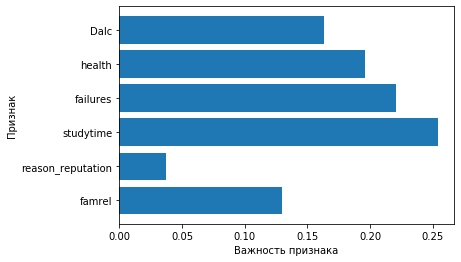

In [38]:
#визуализируем важности признаков
plot_feature_importances( clf_best )

In [39]:
#находим 3 самых важных признака
#ими являются dalc(употребление алкоголя в будни), reason (причина поступления) и failures(количество отказов)
features = []
for name, score in zip( ['famrel', 'reason_reputation', 'studytime', 'failures', 'health', 'Dalc' ], clf_best.feature_importances_):
    features.append([name, score])
features.sort(key = lambda x: x[1], reverse = True)
features[0: 3]

[['studytime', 0.25403379018756844],
 ['failures', 0.2207959714959624],
 ['health', 0.19572941554568138]]

3.1. Продемонстрировать работу случайного леса RandomForestClassifier

In [40]:
#создаем модель и находим accuracy
import sklearn.ensemble

forest = sklearn.ensemble.RandomForestClassifier( n_estimators=100, n_jobs=-1, random_state=17 )
np.mean( sklearn.model_selection.cross_val_score(forest, X_train, y_train, cv=5) )

0.9187356321839081

3.2. С помощью GridSearchCV произвести подбор гиперпараметров для поиск наилучшего леса, посмотреть насколько улучшились метрики

In [41]:
# Поищем наилучшие параметры для случайного леса с помощью GridSearchCV

forest_params = {
    'max_depth': range(1,11),
    'max_features': range(1,7)
}

forest_grid = sklearn.model_selection.GridSearchCV(
    forest, forest_params, cv = 5, n_jobs = -1, verbose = True
)

forest_grid.fit( X_train, y_train )

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    5.2s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=17,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_dep

In [42]:
forest_grid.best_params_, forest_grid.best_score_

({'max_depth': 1, 'max_features': 1}, 0.9391891891891891)

In [43]:
accuracy_score( y_test, forest_grid.predict(X_test) )

0.9797979797979798

Написать, какой классификатор и с камими гиперпараметрами дал в итоге наилучший результат для выбранного датасета на отложенной выборке.

In [44]:
#Наилуднее значение accuracy_score дали KNeighborsClassifier (n_neighbors = 9)
#DecisionTreeClassifier и RandomForestClassifier с параметрами 'max_depth': 1, 'max_features': 1
#Значение accuracy = 0.97